In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("..", "Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]
target_names = ["negative", "positive"]

In [4]:
X = df.drop("Outcome", axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)




C:\Users\Aamber-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aamber-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Aamber-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

C:\Users\Aamber-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aamber-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[ 2.80346794,  0.25977903, -3.78077929, ...,  1.03974028,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.25977903,  0.89724451, ...,  0.40945373,
        -0.70087555, -0.86295593],
       [-0.22446668, -1.85825286,  0.67966201, ...,  0.31753694,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.61235174,  0.89724451, ...,  1.78820556,
         1.96850229,  0.44167036],
       [-1.13284707,  0.63354937, -3.78077929, ...,  1.36801453,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.13518892,  1.44120077, ..., -1.24504846,
        -0.6094383 , -1.03690611]])

k: 1, Train/Test Score: 1.000/0.630
k: 3, Train/Test Score: 0.865/0.698
k: 5, Train/Test Score: 0.833/0.682
k: 7, Train/Test Score: 0.809/0.698
k: 9, Train/Test Score: 0.816/0.677
k: 11, Train/Test Score: 0.800/0.688
k: 13, Train/Test Score: 0.797/0.677
k: 15, Train/Test Score: 0.807/0.719
k: 17, Train/Test Score: 0.800/0.724
k: 19, Train/Test Score: 0.788/0.703


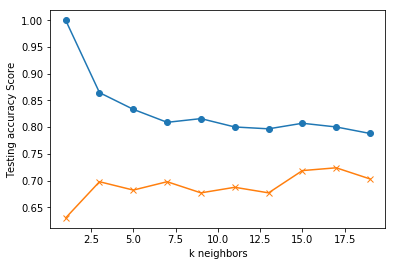

In [16]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
# YOUR CODE HERE
    
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [25]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
# YOUR CODE HERE

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.719
